<a href="https://colab.research.google.com/github/renchuu/AI-ML-EDA/blob/main/Data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing Data

Importing libraries for this step

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mno

In [ ]:
data = pd.read_csv('crown_sentencing.csv', encoding="latin-1", error_bad_lines=False)
#encoding="latin-1",

<ipython-input-10-0ea8c6d26823>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('crown_sentencing.csv', encoding="latin-1", error_bad_lines=False)
Skipping line 5318: expected 19 fields, saw 23
Skipping line 10609: expected 19 fields, saw 28
Skipping line 20573: expected 19 fields, saw 23
Skipping line 25559: expected 19 fields, saw 29

Skipping line 33254: expected 19 fields, saw 26
Skipping line 35933: expected 19 fields, saw 20
Skipping line 41303: expected 19 fields, saw 27
Skipping line 46467: expected 19 fields, saw 21
Skipping line 51339: expected 19 fields, saw 27
Skipping line 53822: expected 19 fields, saw 21
Skipping line 56474: expected 19 fields, saw 22
Skipping line 63907: expected 19 fields, saw 23

Skipping line 69227: expected 19 fields, saw 24
Skipping line 71819: expected 19 fields, saw 28
Skipping line 79743: expected 19 fields, saw 23
Skipping line 846

In [ ]:
data.duplicated().sum()

195981

In [ ]:
data.drop_duplicates()
print(data.duplicated().sum())

195981


In [ ]:

#handling whitespaces and specific missing values
data = data.replace(to_replace=r'^\s*$', value=np.NAN, regex=True)
data = data.replace('N/A', np.NAN)

In [ ]:
for column in data.columns:
  if (data[column].isna().sum() >4000):
    data = data.drop(columns = column)

In [ ]:
#separating columns
categorical_columns = list(set(data.columns) - set(data._get_numeric_data().columns))
num_columns = list(set(data._get_numeric_data().columns))

In [ ]:
#filling nulls with mean and mod
for column in num_columns:
  data[column] = data[column].replace(np.nan ,float(data[column].mean()))

for column in categorical_columns:
  data[column] = data[column].replace(np.nan ,data.mode()[column][0])

#dropping any left nulls
data.dropna(inplace=True)

<ipython-input-16-3e9ced8df0a1>:6: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  data[column] = data[column].replace(np.nan ,data.mode()[column][0])
<ipython-input-16-3e9ced8df0a1>:6: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  data[column] = data[column].replace(np.nan ,data.mode()[column][0])
<ipython-input-16-3e9ced8df0a1>:6: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  data[column] = data[column].replace(np.nan ,data.mode()[column][0])
<ipython-input-16-3e9ced8df0a1>:6: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  data[column] = data[column].replace(np.nan ,data.mode()[column][0])
<ipython-input-16-3e9ced8df0a1>:6: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  data[column] = data[column].replace(np.nan ,data.mode()[column][0])
<ipython-input-16-3e9ced8

<ipython-input-17-3966589a7a2a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr().abs()
<ipython-input-17-3966589a7a2a>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

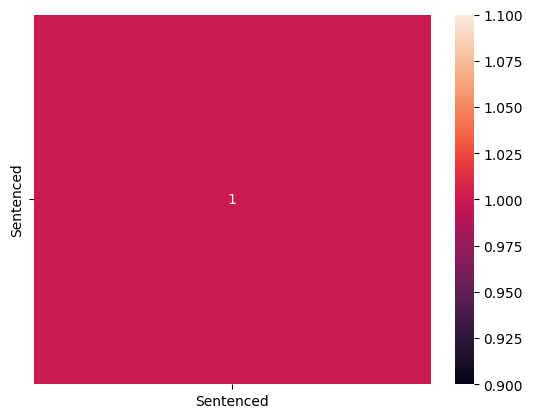

In [ ]:
#creating heatmap to visualise correlations for redundancy
corrmat = data.corr().abs()
top_corr_features = corrmat.index

# plt.figure(figsize=(10,10))
# g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")
sns.heatmap(data.corr(), annot=True)

In [ ]:
#masking upper triangle
mask = np.triu(np.ones_like(corrmat, dtype = bool))
tri = corrmat.mask(mask)

#removing highly correlated features
cor_feature = [x for x in tri.columns if any(tri[x] > 0.75) ]

data = data.drop(cor_feature, axis = 1)

In [ ]:

#removing irrelevant features

def condition(x): #condition to check
    return x < 0.1

irr_feature = []
for x in tri.columns:
  n_satisfying = np.count_nonzero(condition(tri[x]))  #count if condition is satisfied
  most_meet_condition = n_satisfying > len(tri[x]) // 2   #if most of the elements satisfies returns true
  if most_meet_condition:
     irr_feature.append(x)

data = data.drop(irr_feature, axis = 1)

In [ ]:
#saving the data

data.to_csv("criminal-records-cleaned.csv", index = False)

# Visuals

# ML *Code*
-checking data-

In [ ]:
data = pd.read_csv("criminal-records-cleaned.csv")

In [ ]:
data.describe()

,Sentenced
count,571044.000000
mean,1.114387
std,0.451578
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,21.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571044 entries, 0 to 571043
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           571044 non-null  object 
 1   Year                 571044 non-null  object 
 2   Quarter              571044 non-null  object 
 3   Offence type         571044 non-null  object 
 4   Offence group        571044 non-null  object 
 5   HO offence code      571044 non-null  object 
 6   Offence              571044 non-null  object 
 7   Person/other         571044 non-null  object 
 8   Sex                  571044 non-null  object 
 9   Age group            571044 non-null  object 
 10  Age range            571044 non-null  object 
 11  Police Force Area    571044 non-null  object 
 12  Sentence Outcome     571044 non-null  object 
 13  Detailed Sentence    571044 non-null  object 
 14  Plea at Crown Court  571044 non-null  object 
 15  Sentenced        

In [ ]:
data['Offence type'].unique()

array(['01: Indictable only', '02: Triable Either Way', 'diate custody',
       '03: Summary non-motoring', '04: Summary motoring', '05 Not known',
       '02: Tr: Suspended sentence',
       '02: Triable Either Way in production of a controlled drug - class B (cannabis, including cannabis resin, cannabinol and cannabinol derivatives)',
       'Metropolitan Police', '02: Triable Either B', '02: Male',
       '07: Total Immediate custody', ',NA,08: Suspended Sentence"',
       '01: Female', '02: Triable Either g', 'Way', '02: Young adults'],
      dtype=object)

In [ ]:
data['Offence group'].value_counts()

06: Drug offences                                                                                                      111529
01: Violence against the person                                                                                         98173
09: Miscellaneous crimes against society                                                                                93148
04: Theft Offences                                                                                                      68945
07: Possession of weapons                                                                                               42768
02: Sexual offences                                                                                                     36312
08: Public order offences                                                                                               35094
11: Summary non-motoring                                                                                              

# Creating Random Forest Model

**Splitting data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
#input and target
x = data.drop('Sentenced', axis = 1)
y = data['Sentenced']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(pd.get_dummies(x), y, test_size=0.3)

**Creating model**

In [ ]:
data

In [ ]:
classifier = RandomForestClassifier()

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
#confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)

labels = data.columns

figure = plt.figure(figsize = (10,10))
ax = sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='.0f', xticklabels = labels, yticklabels = labels)
ax.set_title('confusion matrix')
ax.set_xlabel('predicted values')
ax.set_ylabel('actual values')